In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## binary classification with wine data

### data loading and preprocessing

In [0]:
red=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

In [22]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [0]:
#target 속성 추가
red['type']=0
white['type']=1

In [0]:
wine=pd.concat([red,white],axis=0)

In [28]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wine=scaler.fit_transform(wine)

In [30]:
pd.DataFrame(wine)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0


In [0]:
np.random.shuffle(wine)

In [32]:
pd.DataFrame(wine).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.338843,0.160000,0.307229,0.018405,0.551495,0.055556,0.115207,0.188741,0.248062,0.483146,0.173913,0.500000,0.0
1,0.239669,0.146667,0.210843,0.012270,0.284053,0.121528,0.354839,0.127048,0.302326,0.179775,0.202899,0.500000,1.0
2,0.247934,0.086667,0.162651,0.269172,0.054817,0.138889,0.322581,0.250434,0.449612,0.078652,0.101449,0.333333,1.0
3,0.355372,0.140000,0.216867,0.024540,0.064784,0.118056,0.108295,0.152111,0.426357,0.443820,0.637681,0.666667,0.0
4,0.181818,0.106667,0.162651,0.019939,0.064784,0.135417,0.377880,0.128976,0.713178,0.179775,0.289855,0.666667,1.0


In [33]:
train_idx=int(len(wine)*0.8)
train_X,train_Y,test_X,test_Y=wine[:train_idx,:-1],wine[:train_idx,-1],wine[train_idx:,:-1],wine[train_idx:,-1] #train test split
tf.keras.utils.to_categorical(train_Y,num_classes=2) #one hot encoding
tf.keras.utils.to_categorical(test_Y,num_classes=2) #one hot encoding

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### training

In [34]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=24,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [35]:
history=model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 190us/sample - loss: 0.1312 - accuracy: 0.9469 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 2/25
3897/3897 [==============================] - 0s 102us/sample - loss: 0.0645 - accuracy: 0.9826 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 3/25
3897/3897 [==============================] - 0s 97us/sample - loss: 0.0436 - accuracy: 0.9882 - val_loss: 0.0222 - val_accuracy: 0.9931
Epoch 4/25
3897/3897 [==============================] - 0s 100us/sample - loss: 0.0472 - accuracy: 0.9882 - val_loss: 0.0556 - val_accuracy: 0.9800
Epoch 5/25
3897/3897 [==============================] - 0s 105us/sample - loss: 0.0355 - accuracy: 0.9902 - val_loss: 0.0421 - val_accuracy: 0.9900
Epoch 6/25
3897/3897 [==============================] - 0s 102us/sample - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0239 - val_accuracy: 0.9900
Epoch 7/25
3897/3897 [==============================] - 0s 101us/

<function matplotlib.pyplot.show>

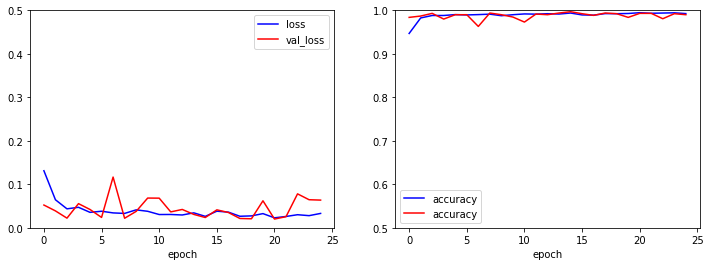

In [40]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.ylim(0,0.5)
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='accuracy')
plt.ylim(0.5,1)
plt.xlabel('epoch')
plt.legend()

plt.show

In [45]:
history=model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25,
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss')])

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 0s 105us/sample - loss: 0.0360 - accuracy: 0.9902 - val_loss: 0.0920 - val_accuracy: 0.9908
Epoch 2/25
3897/3897 [==============================] - 0s 99us/sample - loss: 0.0344 - accuracy: 0.9923 - val_loss: 0.0234 - val_accuracy: 0.9946
Epoch 3/25
3897/3897 [==============================] - 0s 100us/sample - loss: 0.0266 - accuracy: 0.9928 - val_loss: 0.0463 - val_accuracy: 0.9938
Epoch 4/25
3897/3897 [==============================] - 0s 99us/sample - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 5/25
3897/3897 [==============================] - 0s 98us/sample - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0537 - val_accuracy: 0.9946
Epoch 6/25
3897/3897 [==============================] - 0s 102us/sample - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.0423 - val_accuracy: 0.9931
Epoch 7/25
3897/3897 [==============================] - 0s 99us/sam

<function matplotlib.pyplot.show>

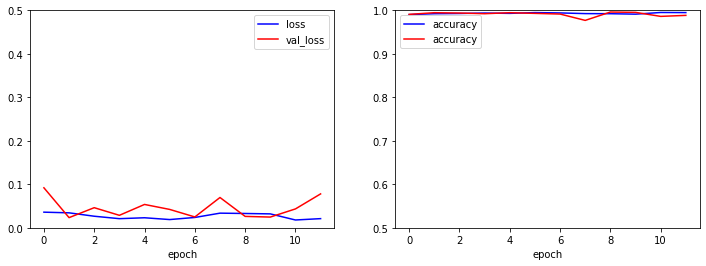

In [47]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.ylim(0,0.5)
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='accuracy')
plt.ylim(0.5,1)
plt.xlabel('epoch')
plt.legend()

plt.show

In [51]:
type(history)

tensorflow.python.keras.callbacks.History